| Field | Value |
|-|-|
| simulation file | artola_good_params.py |
| result files prefix | artola_good_params |
| # result files | 1\*1\*2\*1\*1\*1\*9 = 18 |
| simulation start | 2015-02-11 17:58:32 |
| simulation end | 2015-02-11 18:03:13 |
| duration | 0:04:41 |
| repository | https://github.com/dspicher/py_stdp |
| revision hash | [9bd2f4d05b192e1a8b5de03a913f220fcdb6446e](https://github.com/dspicher/py_stdp/tree/9bd2f4d05b192e1a8b5de03a913f220fcdb6446e) |

### Results
<font color='grey'>n/a</font>

### Conclusion
<font color='grey'>n/a</font>

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
def get(alpha, beta, r_max, thresh, tau_ref_0, theta_0, Uclamp):
    return cPickle.load(open('stdp_figure_artola_alpha_{0}_beta_{1}_r_max_{2}_thresh_{3}_tau_ref_0_{4}_theta_0_{5}_Uclamp_{6}.p'.format(alpha, beta, r_max, thresh, tau_ref_0, theta_0, Uclamp),'rb'))


alpha_s = [-34.0]
beta_s = [0.25]
r_max_s = [0.015, 0.025]
thresh_s = [-20.0]
tau_ref_0_s = [5.0]
theta_0_s = [2.5]
Uclamp_s = array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.])


params = list(product(alpha_s, beta_s, r_max_s, thresh_s, tau_ref_0_s, theta_0_s, Uclamp_s))

data = {tup:get(*tup) for tup in params}

In [7]:
artola_data = np.loadtxt(open('./experimental_data/artola_voltage_clamp.csv','r'),delimiter=',')
artola_errorbars = np.loadtxt(open('./experimental_data/artola_errorbars.csv','r'),delimiter=',')

In [8]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

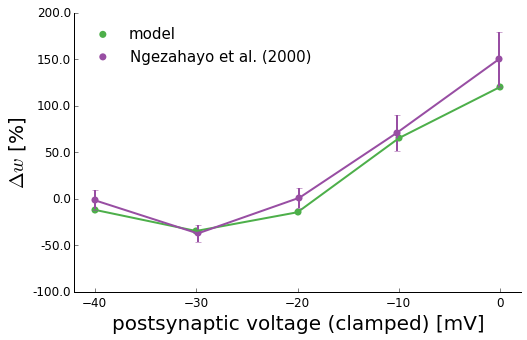

In [10]:
figure(figsize=(8,5))
dws = np.zeros(len(Uclamp_s))
for idx,U2 in enumerate(Uclamp_s):
    p = (alpha_s[0], beta_s[0], r_max_s[0], thresh_s[0], tau_ref_0_s[0], theta_0_s[0], U2)
    dws[idx] = data[p][0].res['weight'][-1]/data[p][0].res['weight'][0]
scatter(Uclamp_s[::2], dws[::2], lw=0, c='#4daf4a', s=50)
scatter(artola_data[:,0],artola_data[:,1],c='#984ea3',s=50,lw=0)
legend(['model','Ngezahayo et al. (2000)'],frameon=False,fontsize=15,scatterpoints=1,loc=0)
plot(Uclamp_s[::2], dws[::2],c='#4daf4a',lw=2)
errorbar(artola_data[:,0],artola_data[:,1],artola_errorbars[:,1]-artola_data[:,1],c='#984ea3',marker='o',markersize=0.01,lw=2)
simpleaxis(gca())
xticks(xticks()[0],fontsize=12)
yticks(yticks()[0],[str(100*a-100) for a in yticks()[0]],fontsize=12)
xlabel('postsynaptic voltage (clamped) [mV]', fontsize=20)
ylabel('$\Delta w$ [%]',fontsize=20)
xlim([-42,2])
savefig('stdp_figure_artola.pdf')